### run first cell first, otherwise plt.show() might not work = no images showing


In [3]:
from matplotlib import pyplot as plt
plt.show()

# FIND FACES

proccesing input_images/photo27.jpeg
proccesing input_images/photo31.jpeg
proccesing input_images/photo46.jpeg
was tilted
proccesing input_images/photo11.jpeg
was tilted
proccesing input_images/photo1.jpeg
was tilted
proccesing input_images/photo10.jpeg
was tilted
proccesing input_images/photo26.jpeg
was tilted
proccesing input_images/photo40.jpeg
was tilted
proccesing input_images/photo17.jpeg
proccesing input_images/photo21.jpeg
was tilted
proccesing input_images/photo14.jpg
proccesing input_images/photo37.jpeg
was tilted
proccesing input_images/photo36.jpeg
was tilted
proccesing input_images/photo20.jpeg
 found no faces in this picture\]


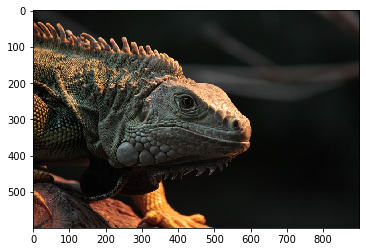

proccesing input_images/photo7.jpeg
was tilted
proccesing input_images/photo16.jpeg
was tilted
proccesing input_images/photo4.jpeg
proccesing input_images/photo15.jpeg
 found no faces in this picture\]


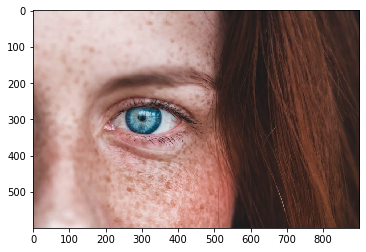

proccesing input_images/photo42.jpeg
was tilted
proccesing input_images/photo39.jpeg
proccesing input_images/photo8.jpeg
was tilted
proccesing input_images/photo19.jpeg
was tilted
proccesing input_images/photo35.jpeg
proccesing input_images/photo23.jpeg
was tilted
proccesing input_images/photo22.jpeg
was tilted
proccesing input_images/photo30.jpg
was tilted
proccesing input_images/photo34.jpeg
 found no faces in this picture\]


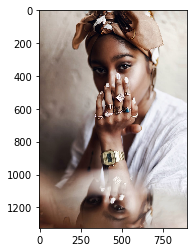

proccesing input_images/photo18.jpeg
was tilted
proccesing input_images/photo9.jpeg
 found no faces in this picture\]


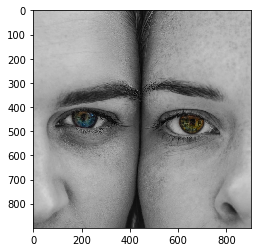

proccesing input_images/photo38.jpeg
was tilted
proccesing input_images/photo43.jpeg
was tilted
proccesing input_images/photo5.jpeg
was tilted
proccesing input_images/photo41.jpg
was tilted
proccesing input_images/photo48.jpeg
was tilted
proccesing input_images/photo33.jpeg
was tilted
proccesing input_images/photo25.jpeg
was tilted
proccesing input_images/photo2.jpeg
 found no faces in this picture\]


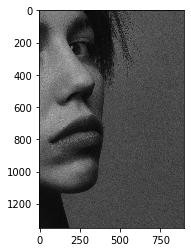

proccesing input_images/photo13.jpeg
proccesing input_images/photo44.jpeg
proccesing input_images/photo6.jpg
was tilted
proccesing input_images/photo29.jpeg
was tilted
proccesing input_images/photo28.jpeg
was tilted
proccesing input_images/photo47.jpg
was tilted
proccesing input_images/photo45.jpeg
was tilted
proccesing input_images/photo12.jpeg
was tilted
proccesing input_images/photo3.jpeg
was tilted
proccesing input_images/photo24.jpeg
proccesing input_images/photo32.jpeg
was tilted


In [4]:
import glob
from PIL import Image
import cv2 
import numpy as np
import types
import os
import m3Face, m3Iris, m3F
from matplotlib import pyplot as plt
inputFolder = "input_images/"
outputFolder = "output_image/"

inputImages=glob.glob(inputFolder + "*.j*")

for imagePath in inputImages:
    
    # if outfolder does not exist, create it
    if not (os.path.exists(outputFolder)):
            os.mkdir(outputFolder)
            print("output folder did not exist,", outputFolder, "created.")
    # read input image
#    imgIn = cv2.imread()
    

    
    # DO STUFF TO ALL IMAGES BELOW
    # *************************

    imgOut = m3Face.findEyes(imagePath)
    # *************************

        #change imagePath from input folder to output folder
    imagePath = imagePath.replace(inputFolder, "")
    imagePath = outputFolder + imagePath
    
    if (type(imgOut) == type(list())):
        #print("was list")
        # if output 
        eyes = iter(imgOut) # used to iterate thru an array. the output of first next() is the first element of array, and so on
        imagePath = imagePath.replace(".", "_Left.")
        cv2.imwrite(imagePath,next(eyes))
        imagePath = imagePath.replace("_Left.", "_Right.")
        cv2.imwrite(imagePath,next(eyes))
    else:
        cv2.imwrite(imagePath,imgOut)


# FIND IRIS

In [1]:
from matplotlib import pyplot as plt
plt.show()

********************************************************
proccesing output_images/photo5_Right.jpeg
NO CIRCLES FOUND^^^\]


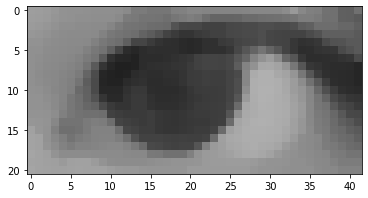

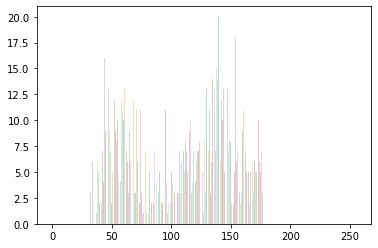

********************************************************
proccesing output_images/photo21_Right.jpeg
NO CIRCLES FOUND^^^\]


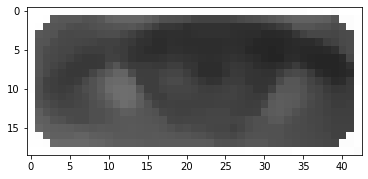

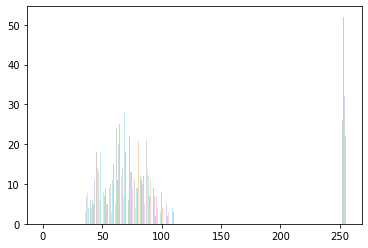

********************************************************
proccesing output_images/photo16_Right.jpeg
CIRCLES FOUND^^^\]


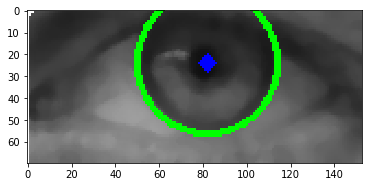

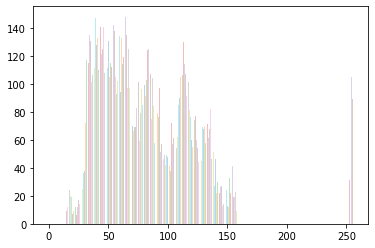

********************************************************
proccesing output_images/photo43_Right.jpeg
NO CIRCLES FOUND^^^\]


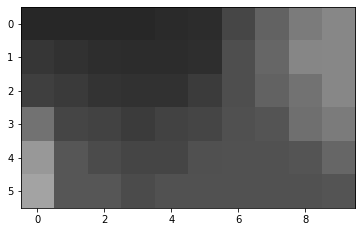

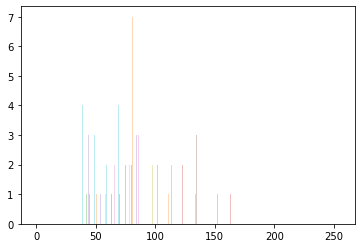

********************************************************
proccesing output_images/photo22_Left.jpeg
CIRCLES FOUND^^^\]


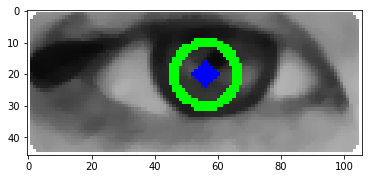

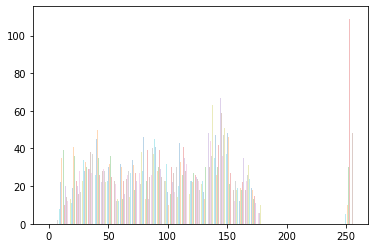

********************************************************
proccesing output_images/photo36_Left.jpeg
NO CIRCLES FOUND^^^\]


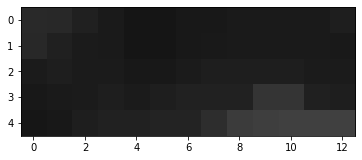

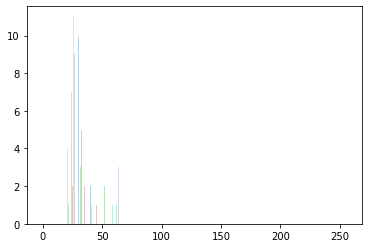

********************************************************
proccesing output_images/photo8_Right.jpeg
NO CIRCLES FOUND^^^\]


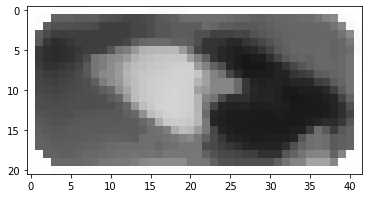

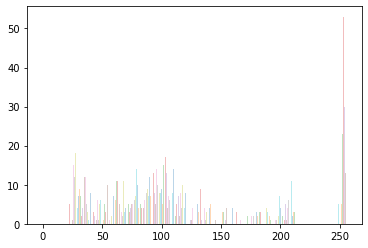

********************************************************
proccesing output_images/photo17_Left.jpeg
NO CIRCLES FOUND^^^\]


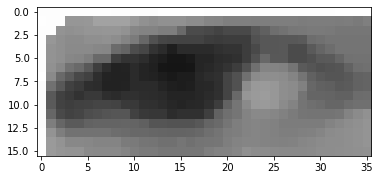

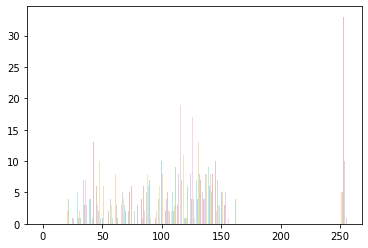

********************************************************
proccesing output_images/photo29_Right.jpeg
NO CIRCLES FOUND^^^\]


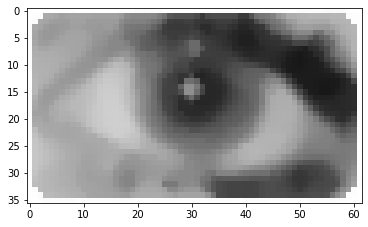

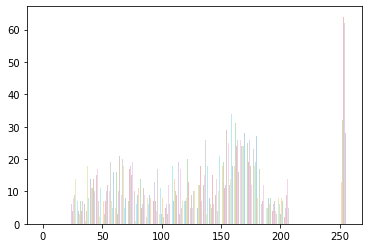

********************************************************
proccesing output_images/photo29_Left.jpeg
CIRCLES FOUND^^^\]


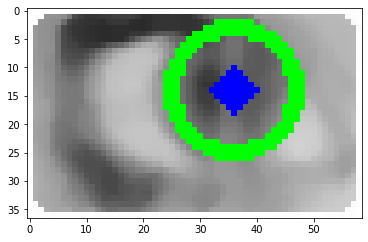

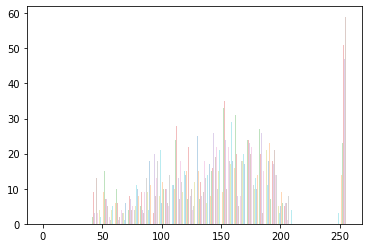

********************************************************
proccesing output_images/photo35_Right.jpeg
NO CIRCLES FOUND^^^\]


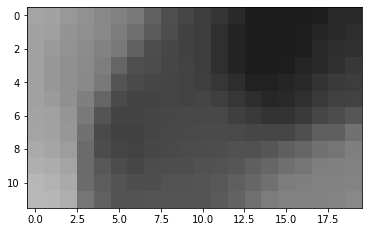

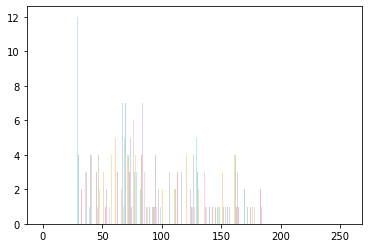

********************************************************
proccesing output_images/photo13_Right.jpeg
NO CIRCLES FOUND^^^\]


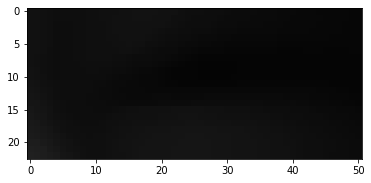

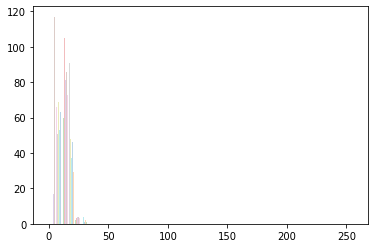

********************************************************
proccesing output_images/photo24_Right.jpeg
CIRCLES FOUND^^^\]


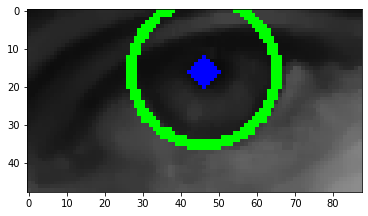

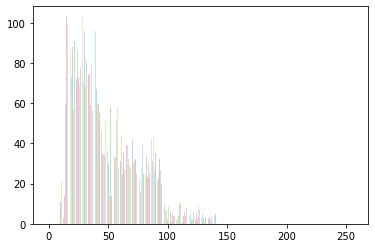

********************************************************
proccesing output_images/photo11_Left.jpeg
NO CIRCLES FOUND^^^\]


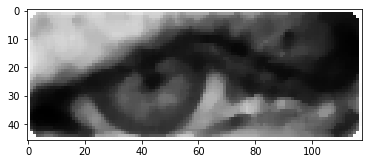

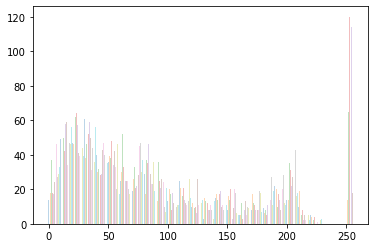

********************************************************
proccesing output_images/photo46_Right.jpeg
NO CIRCLES FOUND^^^\]


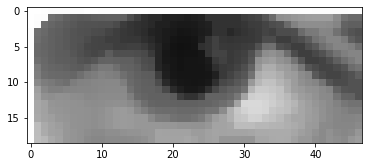

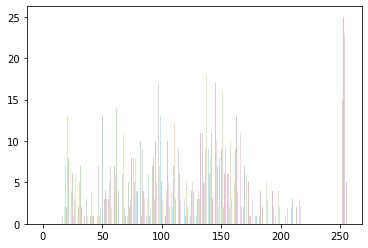

********************************************************
proccesing output_images/photo38_Right.jpeg
NO CIRCLES FOUND^^^\]


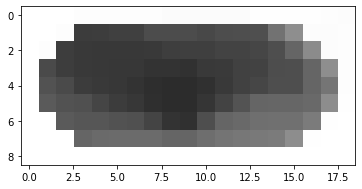

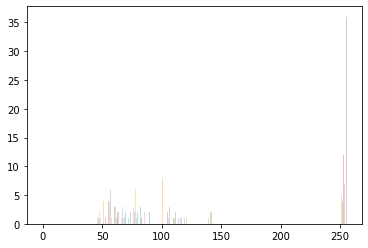

********************************************************
proccesing output_images/photo24_Left.jpeg
NO CIRCLES FOUND^^^\]


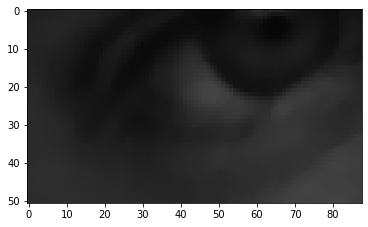

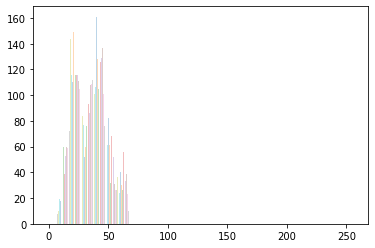

********************************************************
proccesing output_images/photo40_Left.jpeg
CIRCLES FOUND^^^\]


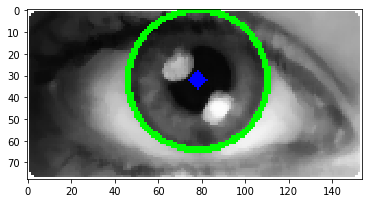

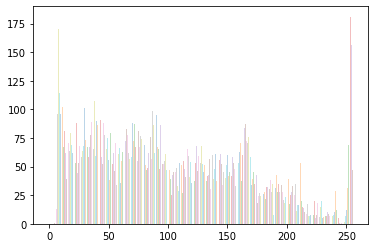

********************************************************
proccesing output_images/photo7_Left.jpeg
CIRCLES FOUND^^^\]


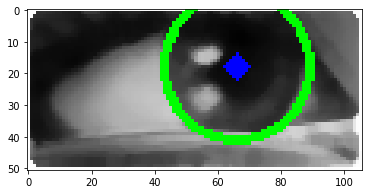

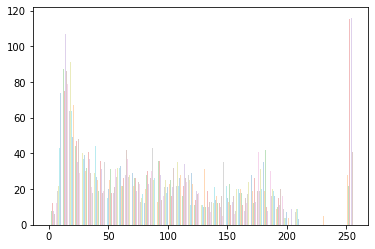

********************************************************
proccesing output_images/photo7_Right.jpeg
CIRCLES FOUND^^^\]


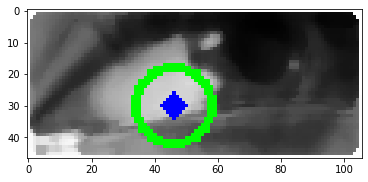

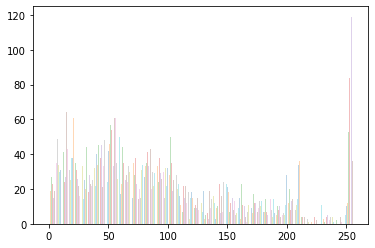

********************************************************
proccesing output_images/photo23_Right.jpeg
NO CIRCLES FOUND^^^\]


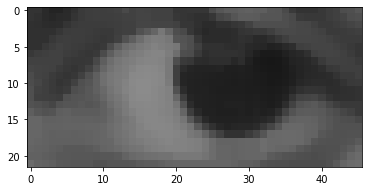

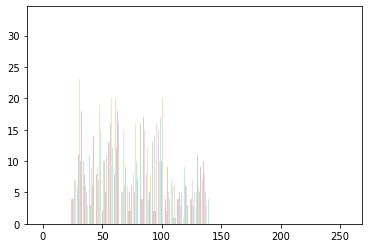

********************************************************
proccesing output_images/photo37_Left.jpeg
CIRCLES FOUND^^^\]


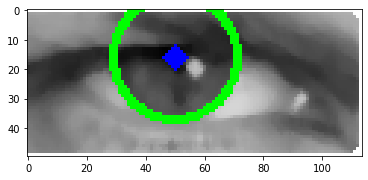

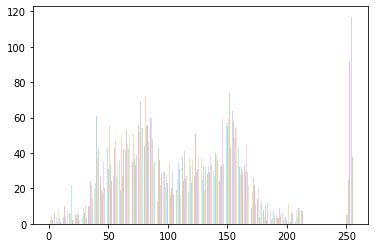

********************************************************
proccesing output_images/photo32_Right.jpeg
NO CIRCLES FOUND^^^\]


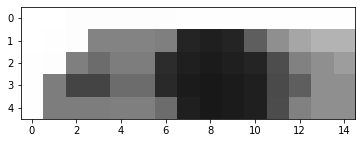

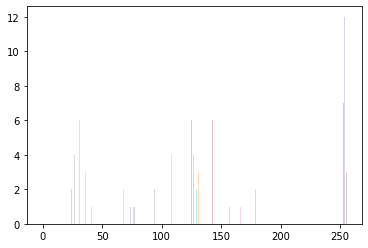

********************************************************
proccesing output_images/photo23_Left.jpeg
NO CIRCLES FOUND^^^\]


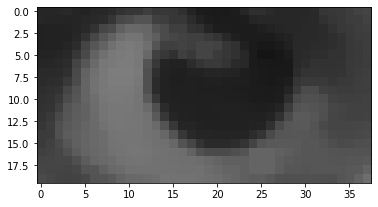

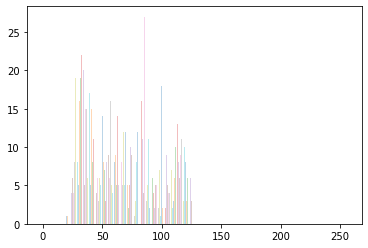

********************************************************
proccesing output_images/photo19_Right.jpeg
NO CIRCLES FOUND^^^\]


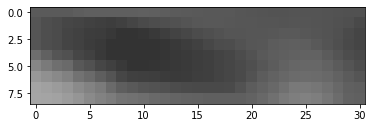

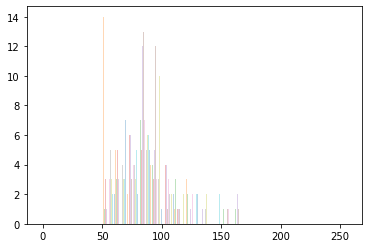

********************************************************
proccesing output_images/photo16_Left.jpeg
CIRCLES FOUND^^^\]


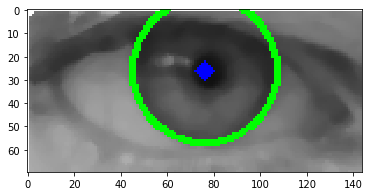

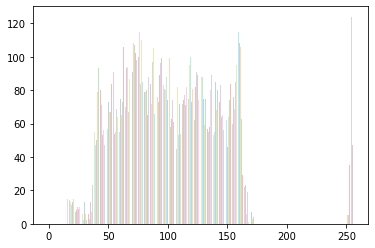

********************************************************
proccesing output_images/photo37_Right.jpeg
NO CIRCLES FOUND^^^\]


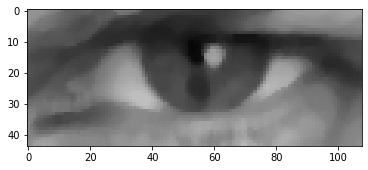

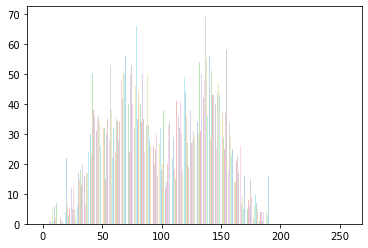

********************************************************
proccesing output_images/photo46_Left.jpeg
NO CIRCLES FOUND^^^\]


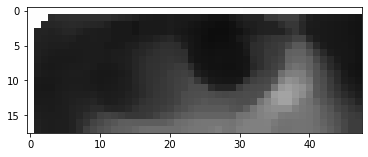

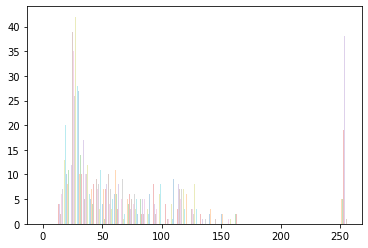

********************************************************
proccesing output_images/photo28_Left.jpeg
NO CIRCLES FOUND^^^\]


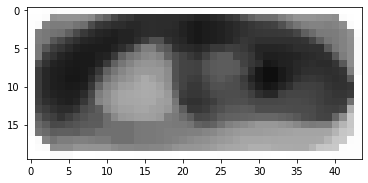

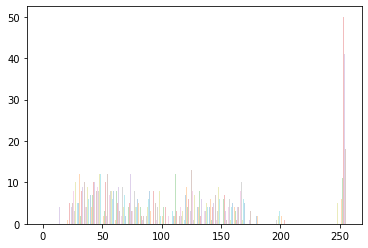

********************************************************
proccesing output_images/photo1_Left.jpeg
CIRCLES FOUND^^^\]


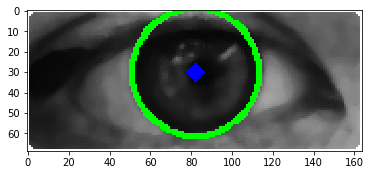

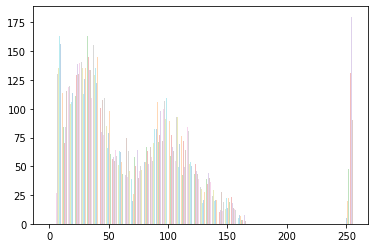

********************************************************
proccesing output_images/photo20.jpeg
NONE IMAGE\]
********************************************************
proccesing output_images/photo10_Left.jpeg
NO CIRCLES FOUND^^^\]


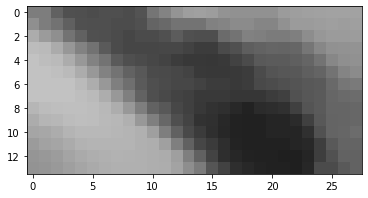

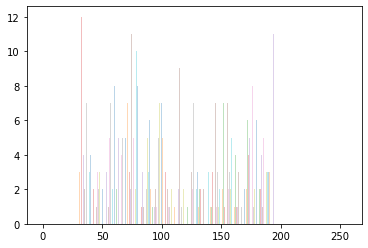

********************************************************
proccesing output_images/photo26_Right.jpeg
NO CIRCLES FOUND^^^\]


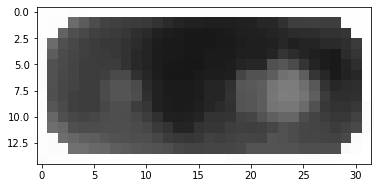

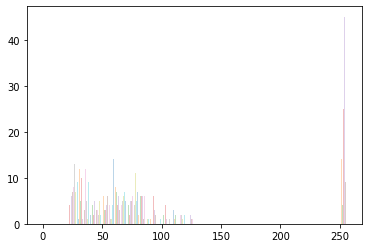

********************************************************
proccesing output_images/photo11_Right.jpeg
CIRCLES FOUND^^^\]


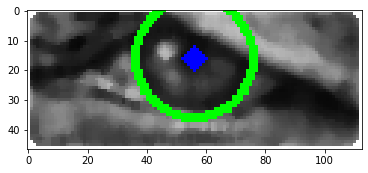

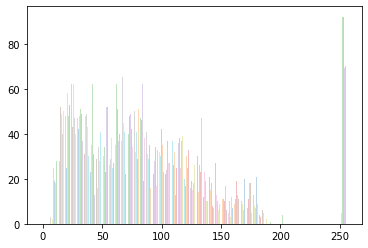

********************************************************
proccesing output_images/photo44_Right.jpeg
NO CIRCLES FOUND^^^\]


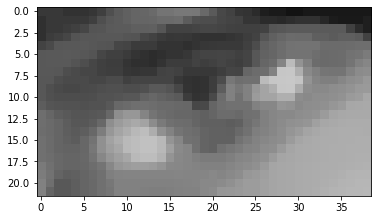

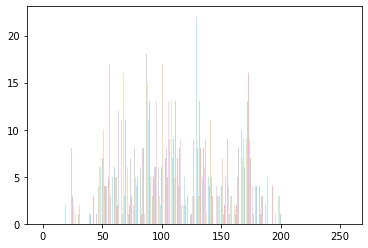

********************************************************
proccesing output_images/photo31_Left.jpeg
NO CIRCLES FOUND^^^\]


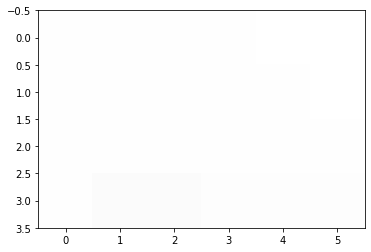

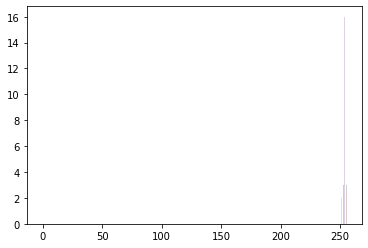

********************************************************
proccesing output_images/photo25_Left.jpeg
NO CIRCLES FOUND^^^\]


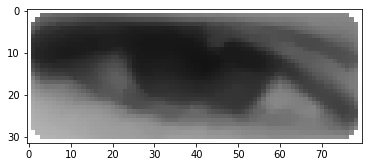

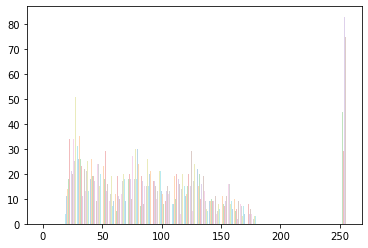

********************************************************
proccesing output_images/photo18_Left.jpeg
NO CIRCLES FOUND^^^\]


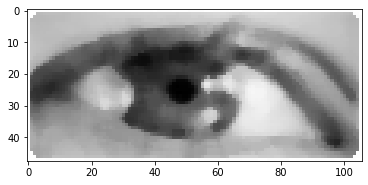

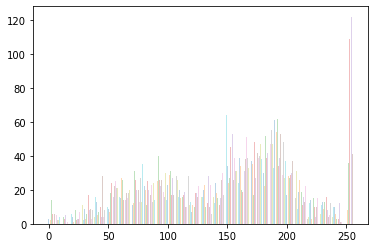

********************************************************
proccesing output_images/photo28_Right.jpeg
NO CIRCLES FOUND^^^\]


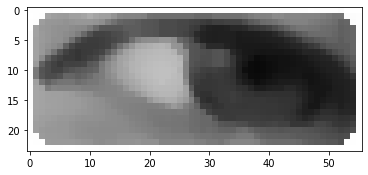

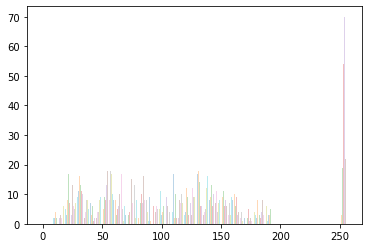

********************************************************
proccesing output_images/photo15.jpeg
NONE IMAGE\]
********************************************************
proccesing output_images/photo4_Left.jpeg
NO CIRCLES FOUND^^^\]


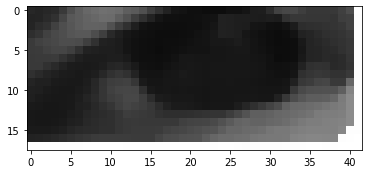

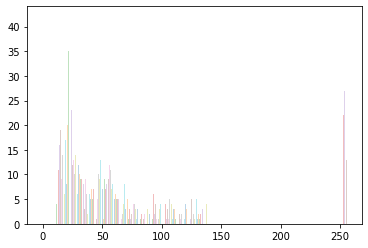

********************************************************
proccesing output_images/photo39_Left.jpeg
NO CIRCLES FOUND^^^\]


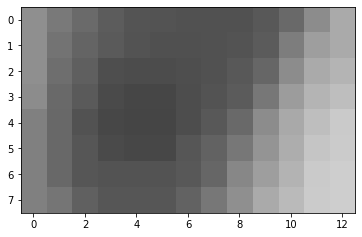

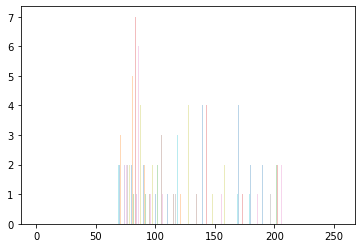

********************************************************
proccesing output_images/photo43_Left.jpeg
NO CIRCLES FOUND^^^\]


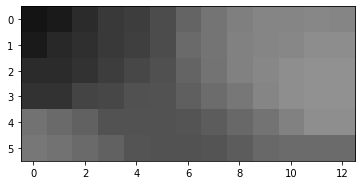

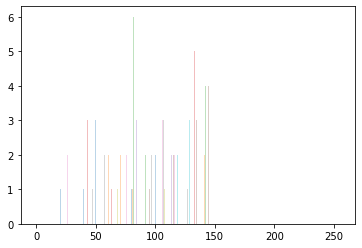

********************************************************
proccesing output_images/photo1_Right.jpeg
CIRCLES FOUND^^^\]


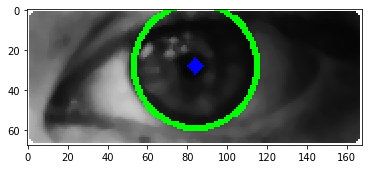

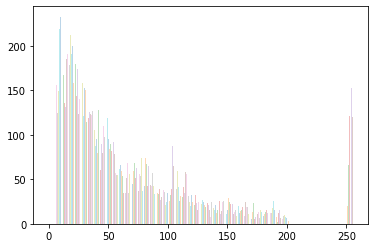

********************************************************
proccesing output_images/photo12_Right.jpeg
NO CIRCLES FOUND^^^\]


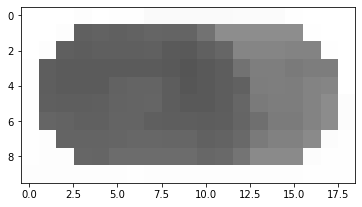

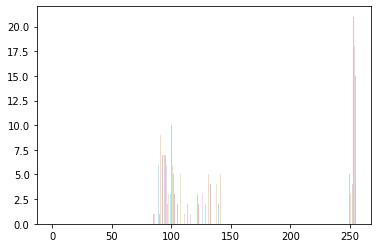

********************************************************
proccesing output_images/photo25_Right.jpeg
NO CIRCLES FOUND^^^\]


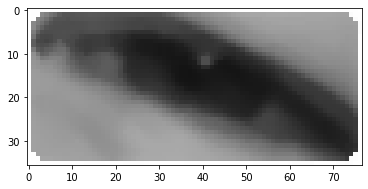

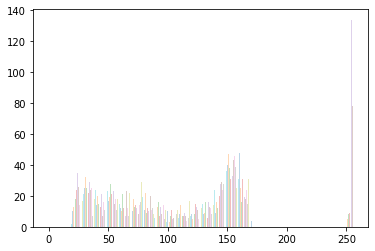

********************************************************
proccesing output_images/photo39_Right.jpeg
NO CIRCLES FOUND^^^\]


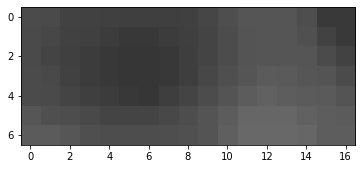

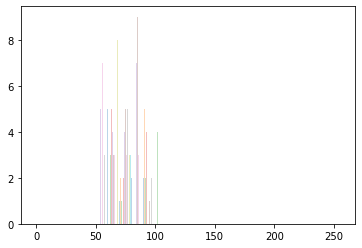

********************************************************
proccesing output_images/photo17_Right.jpeg
NO CIRCLES FOUND^^^\]


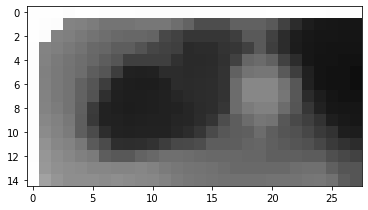

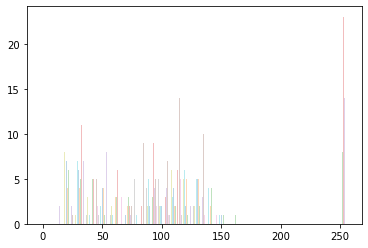

********************************************************
proccesing output_images/photo42_Right.jpeg
NO CIRCLES FOUND^^^\]


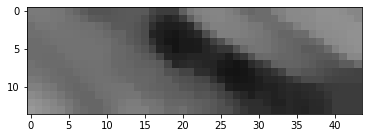

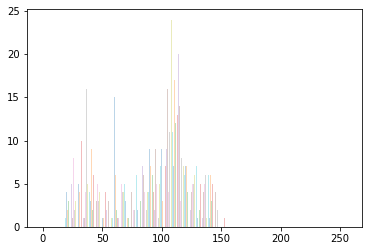

********************************************************
proccesing output_images/photo45_Left.jpeg
CIRCLES FOUND^^^\]


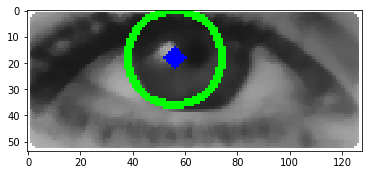

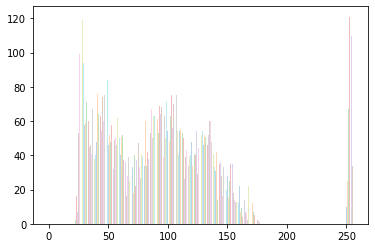

********************************************************
proccesing output_images/photo34.jpeg
NONE IMAGE\]
********************************************************
proccesing output_images/photo4_Right.jpeg
NO CIRCLES FOUND^^^\]


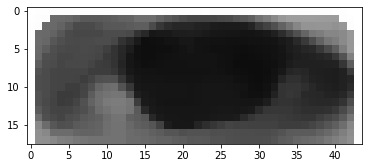

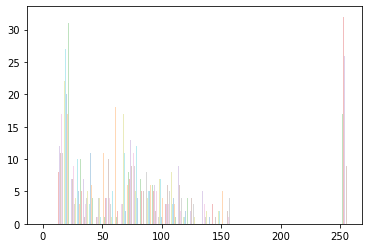

********************************************************
proccesing output_images/photo9.jpeg
NONE IMAGE\]
********************************************************
proccesing output_images/photo26_Left.jpeg
NO CIRCLES FOUND^^^\]


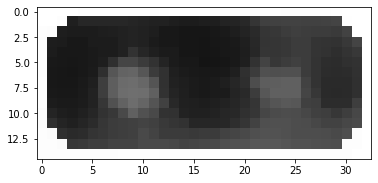

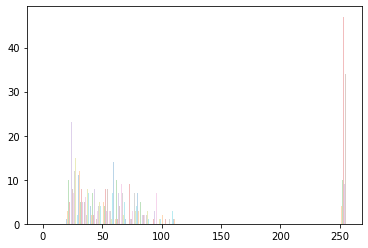

********************************************************
proccesing output_images/photo48_Left.jpeg
NO CIRCLES FOUND^^^\]


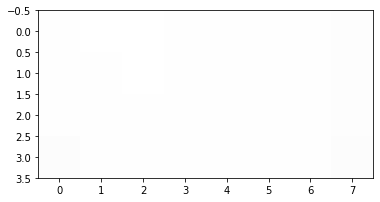

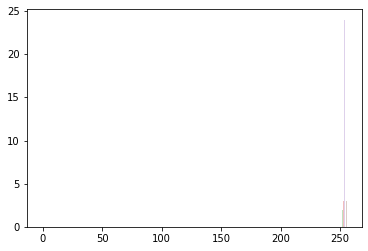

********************************************************
proccesing output_images/photo32_Left.jpeg
NO CIRCLES FOUND^^^\]


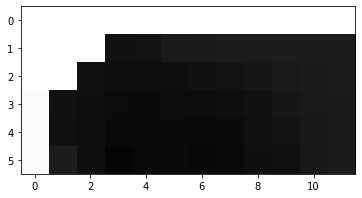

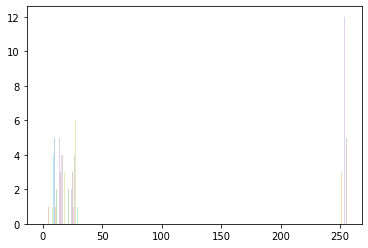

********************************************************
proccesing output_images/photo13_Left.jpeg
NO CIRCLES FOUND^^^\]


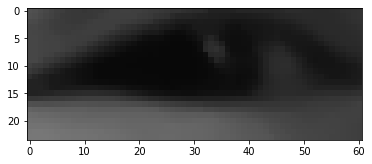

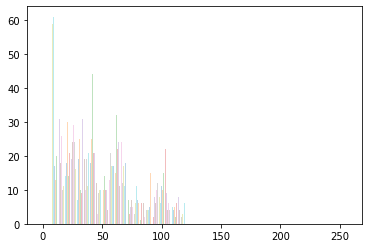

********************************************************
proccesing output_images/photo31_Right.jpeg
NO CIRCLES FOUND^^^\]


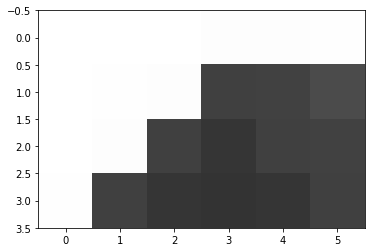

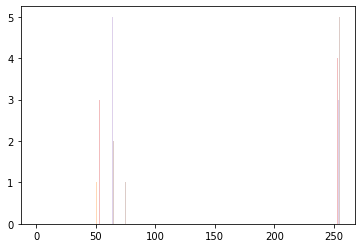

********************************************************
proccesing output_images/photo36_Right.jpeg
NO CIRCLES FOUND^^^\]


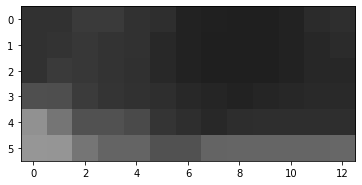

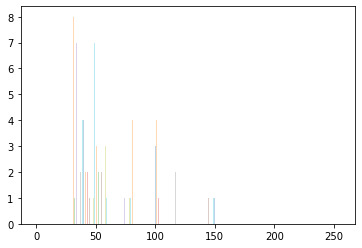

********************************************************
proccesing output_images/photo19_Left.jpeg
NO CIRCLES FOUND^^^\]


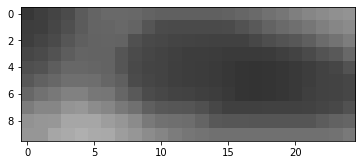

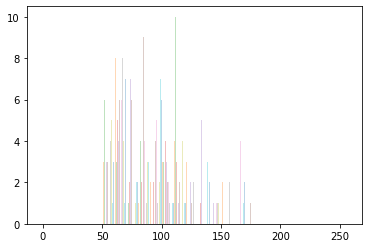

********************************************************
proccesing output_images/photo48_Right.jpeg
NO CIRCLES FOUND^^^\]


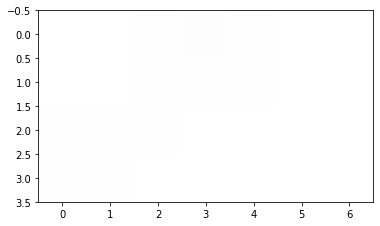

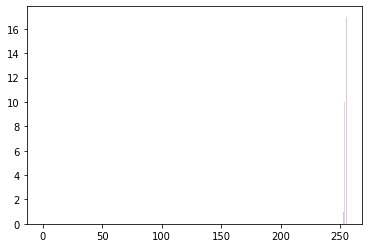

********************************************************
proccesing output_images/photo38_Left.jpeg
NO CIRCLES FOUND^^^\]


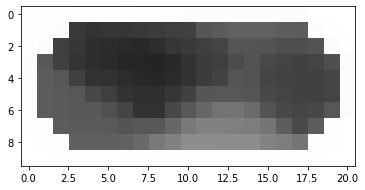

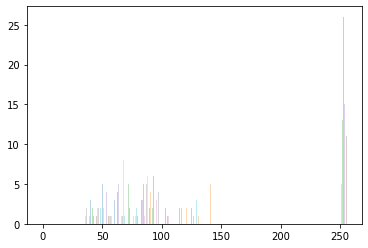

********************************************************
proccesing output_images/photo42_Left.jpeg
NO CIRCLES FOUND^^^\]


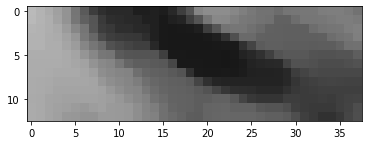

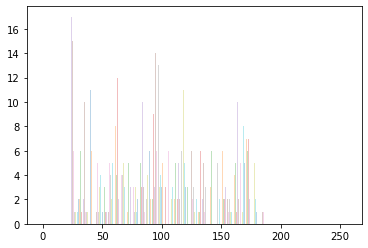

********************************************************
proccesing output_images/photo5_Left.jpeg
NO CIRCLES FOUND^^^\]


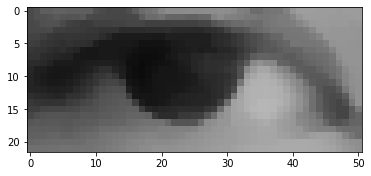

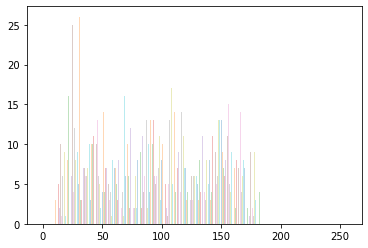

********************************************************
proccesing output_images/photo2.jpeg
NONE IMAGE\]
********************************************************
proccesing output_images/photo35_Left.jpeg
NO CIRCLES FOUND^^^\]


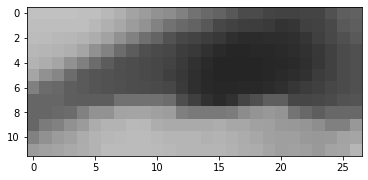

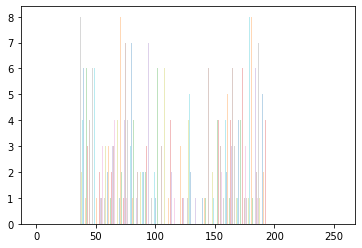

********************************************************
proccesing output_images/photo3_Right.jpeg
NO CIRCLES FOUND^^^\]


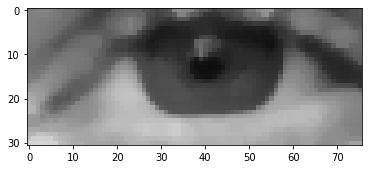

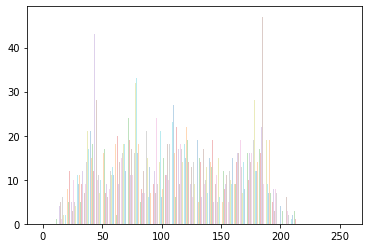

********************************************************
proccesing output_images/photo27_Right.jpeg
NO CIRCLES FOUND^^^\]


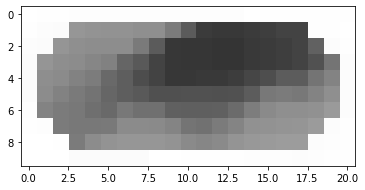

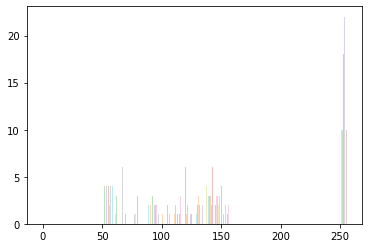

********************************************************
proccesing output_images/photo10_Right.jpeg
NO CIRCLES FOUND^^^\]


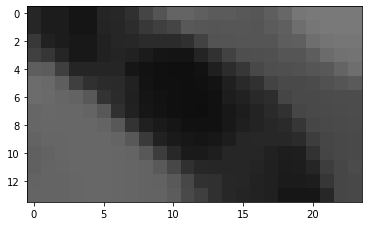

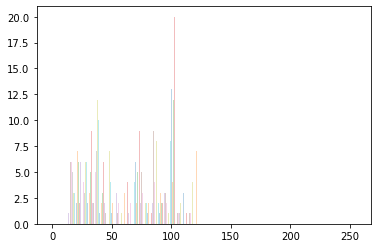

********************************************************
proccesing output_images/photo45_Right.jpeg
CIRCLES FOUND^^^\]


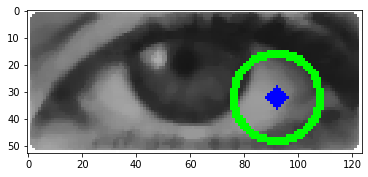

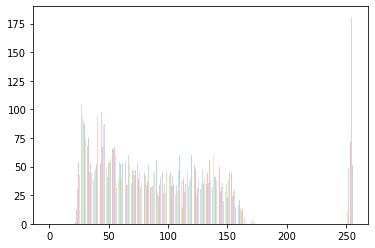

********************************************************
proccesing output_images/photo21_Left.jpeg
NO CIRCLES FOUND^^^\]


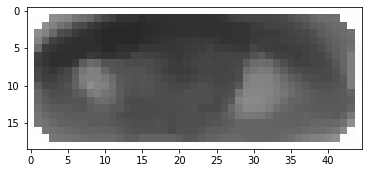

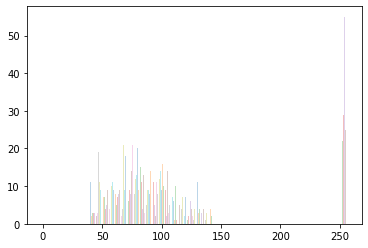

********************************************************
proccesing output_images/photo8_Left.jpeg
NO CIRCLES FOUND^^^\]


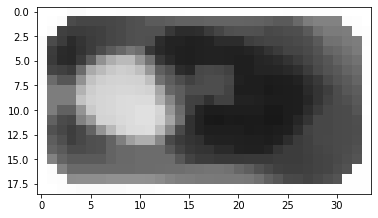

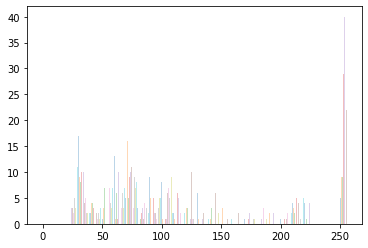

********************************************************
proccesing output_images/photo44_Left.jpeg
NO CIRCLES FOUND^^^\]


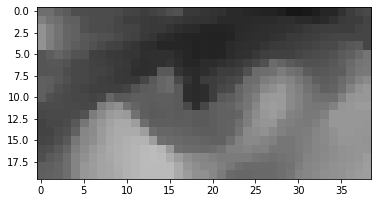

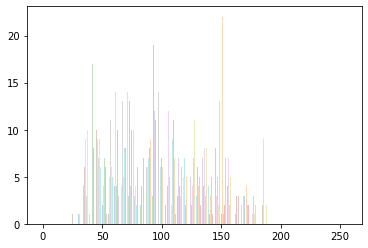

********************************************************
proccesing output_images/photo3_Left.jpeg
NO CIRCLES FOUND^^^\]


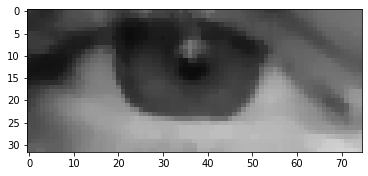

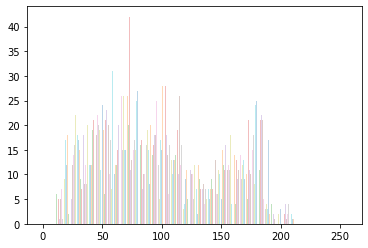

********************************************************
proccesing output_images/photo22_Right.jpeg
NO CIRCLES FOUND^^^\]


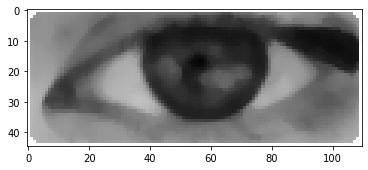

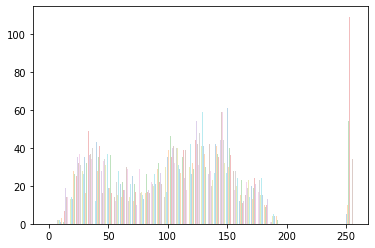

********************************************************
proccesing output_images/photo40_Right.jpeg
CIRCLES FOUND^^^\]


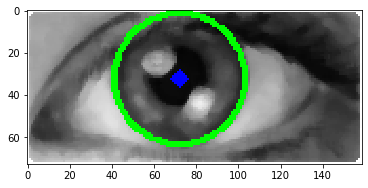

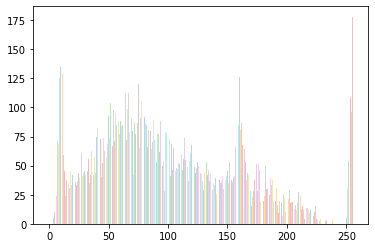

********************************************************
proccesing output_images/photo33_Left.jpeg
NO CIRCLES FOUND^^^\]


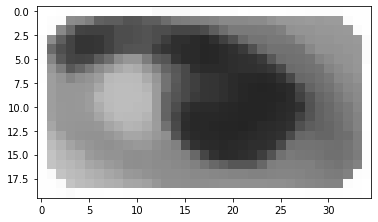

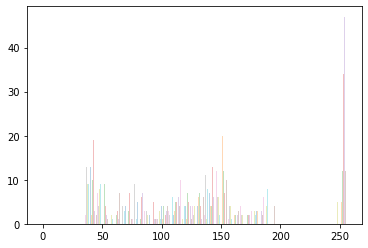

********************************************************
proccesing output_images/photo27_Left.jpeg
NO CIRCLES FOUND^^^\]


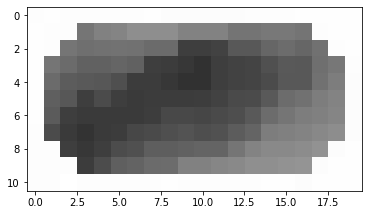

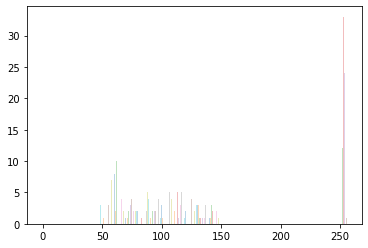

********************************************************
proccesing output_images/photo33_Right.jpeg
NO CIRCLES FOUND^^^\]


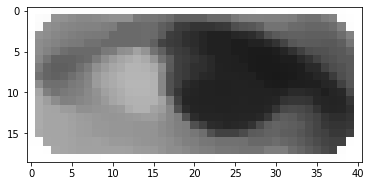

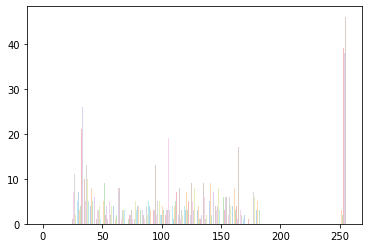

********************************************************
proccesing output_images/photo18_Right.jpeg
CIRCLES FOUND^^^\]


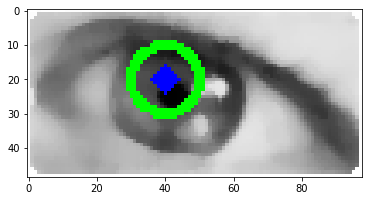

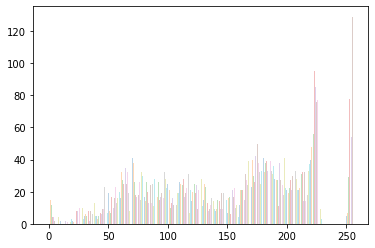

********************************************************
proccesing output_images/photo12_Left.jpeg
NO CIRCLES FOUND^^^\]


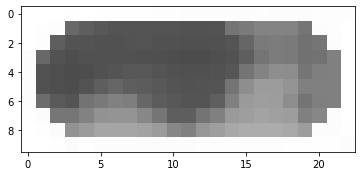

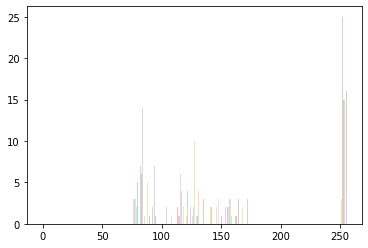

In [2]:
import glob
from PIL import Image
import cv2 
import numpy as np
import types
import os
import m3Iris, m3F
inputFolder = "output_images/"
outputFolder = "out2/"

inputImages=glob.glob(inputFolder + "*.j*")

for imagePath in inputImages:
    
    # if outfolder does not exist, create it
    if not (os.path.exists(outputFolder)):
            os.mkdir(outputFolder)
            print("output folder did not exist,", outputFolder, "created.")
    

    # DO STUFF TO ALL IMAGES BELOW (SENDS IMAGEPATH TO YOUR FUNCTIONS)
    # *************************

    imgOut = m3Iris.findCircle(imagePath)

    # *************************

     #change imagePath from input folder to output folder
    imagePath = imagePath.replace(inputFolder, "")
    imagePath = outputFolder + imagePath
    
    if (type(imgOut) == type(list())):
        #print("was list")
        # if output 
        eyes = iter(imgOut) # used to iterate thru an array. the output of first next() is the first element of array, and so on
        imagePath = imagePath.replace(".", "_Left.")
        cv2.imwrite(imagePath,next(eyes))
        imagePath = imagePath.replace("_Left.", "_Right.")
        cv2.imwrite(imagePath,next(eyes))
    else:
        if not(type(imgOut) == type(None)):
            cv2.imwrite(imagePath,imgOut)
        #else:   
            #m3F.printRed("IMAGE NULL")
